In [1]:
#part 1
#problem1
library ("igraph")


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
#part(a)
l = c(0.003, 0.004, 0.01, 0.05, 0.1)

In [3]:
nodeNum = 1000

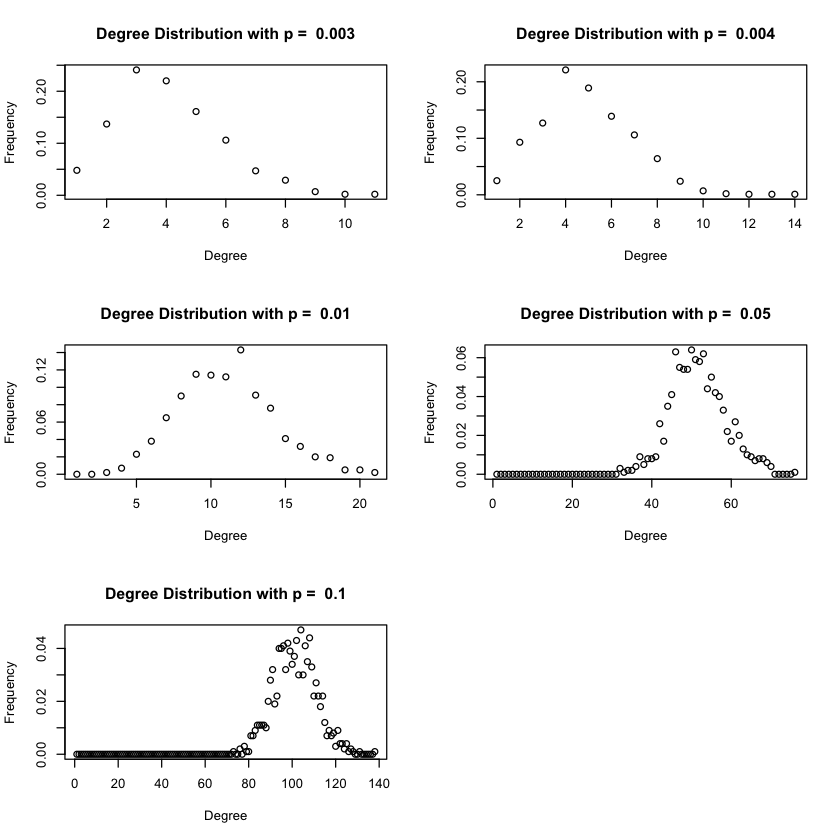

In [35]:
n = length(l)
layout(matrix(c(1,2,3,4,5,6), 3, 2, byrow = TRUE))
means1 = c(1:n);
vars1 = c(1:n);
for(i in 1:n){
    g <- erdos.renyi.game(nodeNum, l[i], directed=F)
    title = paste( "Degree Distribution with p = ",l[i])
    degreesVector <- degree(g)
    means1[i] = mean(degreesVector)
    vars1[i] = var(degreesVector)
    plot(degree.distribution(g),main=title,xlab="Degree",ylab="Frequency")
}

In [36]:
print(means1)
print(vars1)

[1]   3.032   3.856   9.968  50.608 100.222
[1]  3.040016  3.913177  9.904881 47.097433 91.706422


In [37]:
#theoretical value
means2 = c(1 : length(l))
vars2 = c(1 : length(l))
for(i in 1:length(l)){
    means2[i] = (nodeNum - 1) * l[i]
    vars2[i] = (nodeNum - 1)  * l[i] * (1 - l[i])
}
print(means2)
print(vars2)

[1]  2.997  3.996  9.990 49.950 99.900
[1]  2.988009  3.980016  9.890100 47.452500 89.910000


In [38]:
#part(b)
#not all random realization of the ER network connected
iter <- 2000
connected = c(0,0,0,0,0)
diameters = c(0,0,0,0,0)
for(i in 1:iter){
    for(j in 1:length(l)){
        g <- erdos.renyi.game(nodeNum, l[j], directed=F)
        connected[j] = connected[j] + is.connected(g)
        if(diameters[j] == 0 && !is.connected(g)){
            g.components <- clusters(g)
            # which is the largest component
            ix <- which.max(g.components$csize)
            # get the subgraph correspondent to just the giant component
            g.giant <- induced.subgraph(g, which(g.components$membership == ix))
            diameters[j] = diameter(g.giant)
        }
    }  
}

In [39]:
connected / iter


[1] 0.0000 0.0000 0.9705 1.0000 1.0000

In [40]:
diameters

[1] 14 11  6  0  0

In [41]:
#part(c)
p_upper <- log(nodeNum) / nodeNum
print(p_upper)

[1] 0.006907755


In [42]:

p_list <- seq(0.00001, 3 * p_upper, p_upper / 50)

In [13]:
normalizedGCC = rep(0,length(p_list))
for(i in 1:length(p_list)){
    for(j in 1 : 100){
        g <- erdos.renyi.game(nodeNum, p_list[i], directed=F)
        #print(p_list[j])
        g.components <- clusters(g)
        ix <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
        #print(vcount(g.giant))
        #print((vcount(g.giant)) / nodeNum)
        normalizedGCC[i] = normalizedGCC[i] + (vcount(g.giant)) / nodeNum
    }
    normalizedGCC[i] = normalizedGCC[i] / 100.0
}

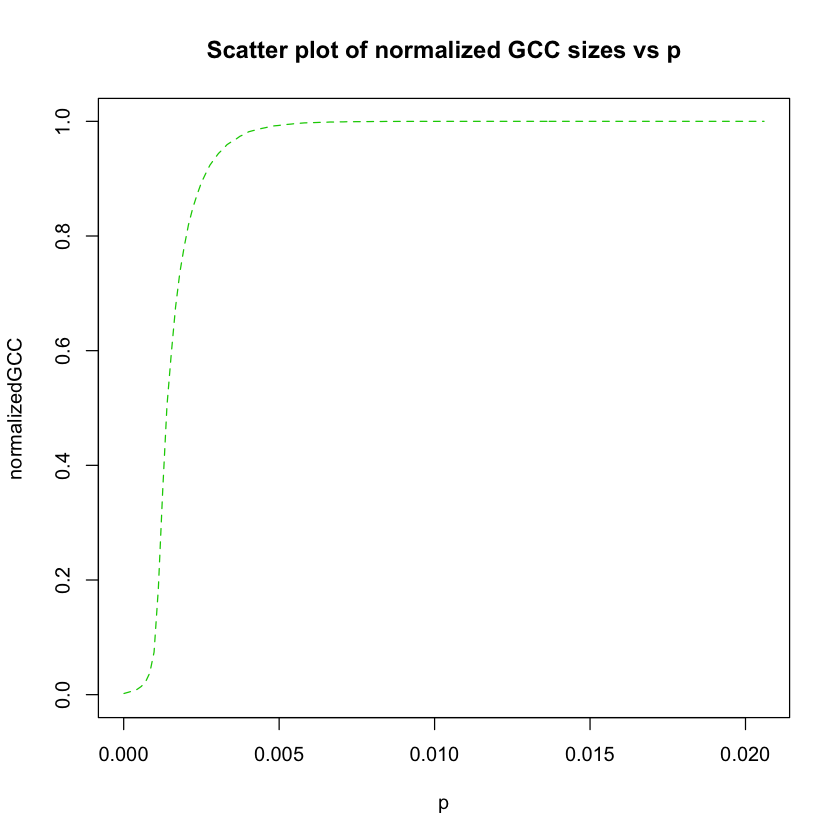

In [44]:
p = p_list
plot(p, normalizedGCC, main = "Scatter plot of normalized GCC sizes vs p", type = "l", ylim = c(0, 1), col = 3, lty = 2)

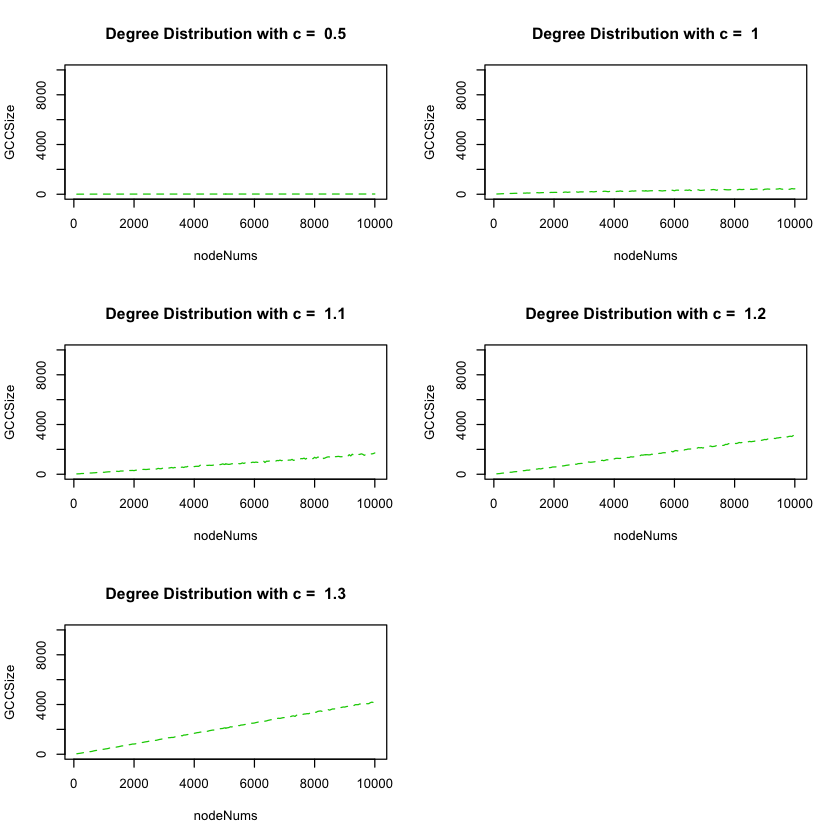

In [46]:
#part(d)
c_list = c(0.5, 1, 1.1, 1.2, 1.3)
layout(matrix(c(1,2,3,4,5,6), 3, 2, byrow = TRUE))
for(c in c_list){
    GCCSize <- rep(0, length(seq(100, 10000, 50)))
    i = 1
    for(n in seq(100, 10000, 50)){
        p = c / n
        for(j in 1:100){
            g <- erdos.renyi.game(n, p, directed=F)
            g.components <- clusters(g)
            ix <- which.max(g.components$csize)
            g.giant <- induced.subgraph(g, which(g.components$membership == ix))
            GCCSize[i] = GCCSize[i] + (vcount(g.giant))
        }
        GCCSize[i] = GCCSize[i] / 100;
        i = i + 1
    }
    #print(GCCSize)
    title = paste( "Degree Distribution with c = ",c)
    nodeNums = seq(100, 10000, 50)
    plot(nodeNums, GCCSize, main=title, type = "l", ylim = c(0, 10000), col = 3, lty = 2)       
}

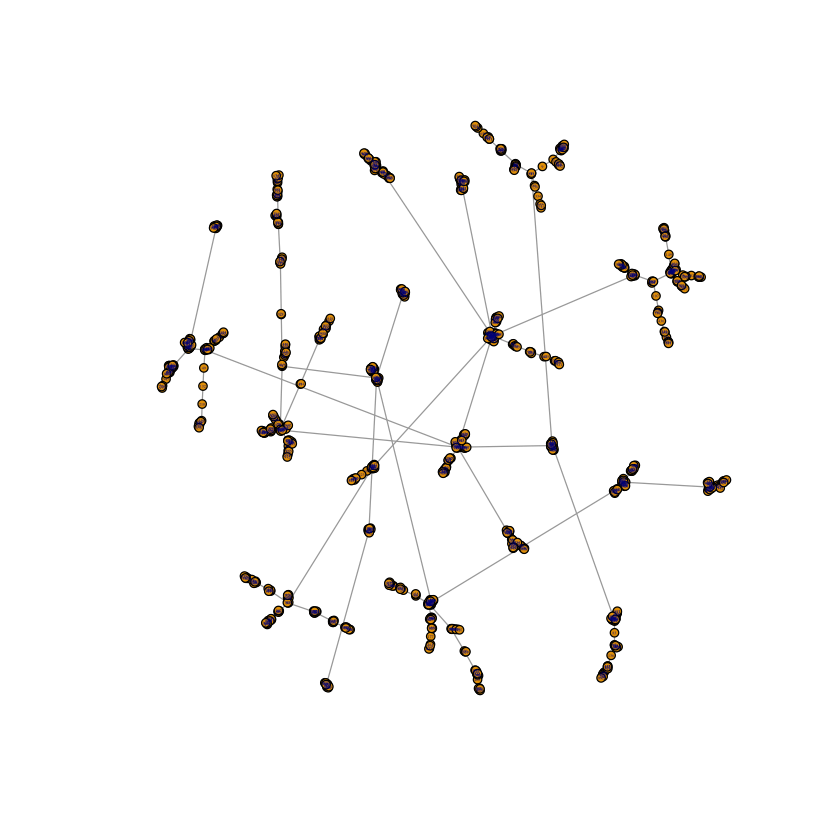

In [17]:
#problem 2
#part (a)
g1 <- barabasi.game(1000, m = 1 ,directed=F)
plot(g1,vertex.size=3, vertex.label.cex=0.2)
#this netowrks are always connected

In [18]:
#part(b)
fg <- fastgreedy.community(g1)
print(modularity(fg))

[1] 0.9334224


In [19]:
#part(c)
g2 <- barabasi.game(10000, m = 1 ,directed=F)
fg2 <- fastgreedy.community(g2)
print(modularity(fg2))

[1] 0.9781461


In [47]:
#layout(matrix(c(1,2), 1, 2, byrow = TRUE))
#plot(degree.distribution(g),main=title,xlab="Degree",ylab="Frequency")
#degree.distribution(g1)
#degree.distribution(g2)
install.packages("poweRlaw")


The downloaded binary packages are in
	/var/folders/m8/x2xsw5fx5p59wj_j153sbmmm0000gn/T//RtmpitpKxA/downloaded_packages


[1] 3.116049
[1] 3.41416


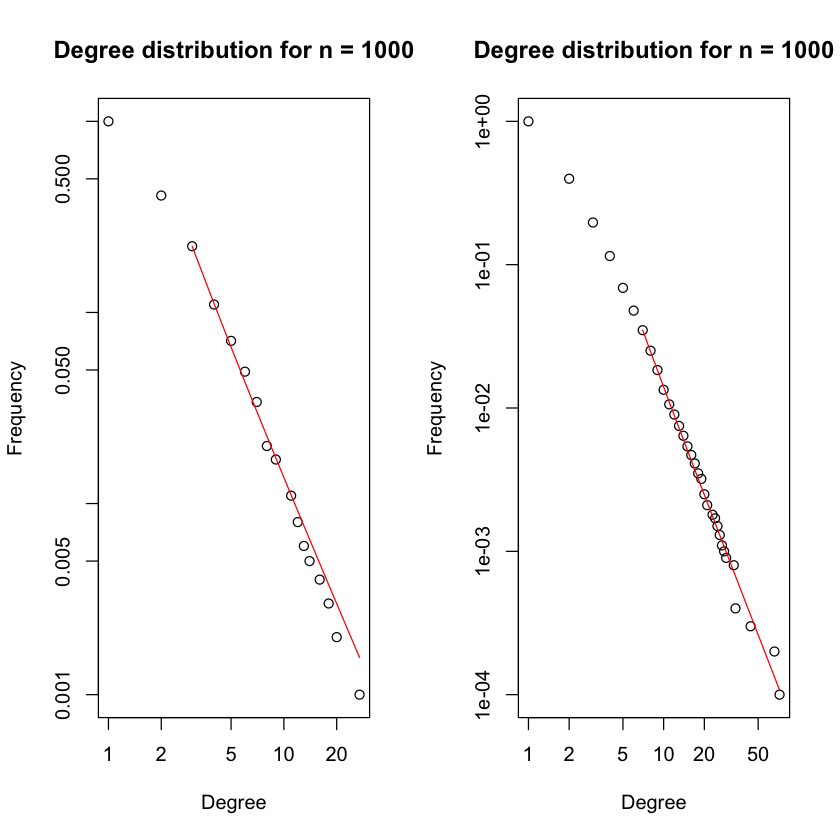

In [31]:
#part(d)
layout(matrix(c(1,2), 1, 2, byrow = TRUE))
degreesVector1 <- degree(g1)
degreesVector2 <- degree(g2)
title1 = "Degree distribution for n = 1000"
title2 = "Degree distribution for n = 10000"
library(poweRlaw)
mm1 = displ$new(degreesVector1)
est1 = estimate_xmin(mm1)
print(est1[[3]])#print gamma, slope = -gamma
mm1$setXmin(est1[[2]])
mm1$setPars(est1[[3]])
plot(mm1,main=title1,xlab="Degree",ylab="Frequency")
lines(mm1,col=2)
mm2 = displ$new(degreesVector2)
est2 = estimate_xmin(mm2)
print(est2[[3]])#print gamma, slope = -gamma
mm2$setXmin(est2[[2]])
mm2$setPars(est2[[3]])
plot(mm2,main=title1,xlab="Degree",ylab="Frequency")
lines(mm2,col=2)

[1] 2.32289
[1] 2.699154


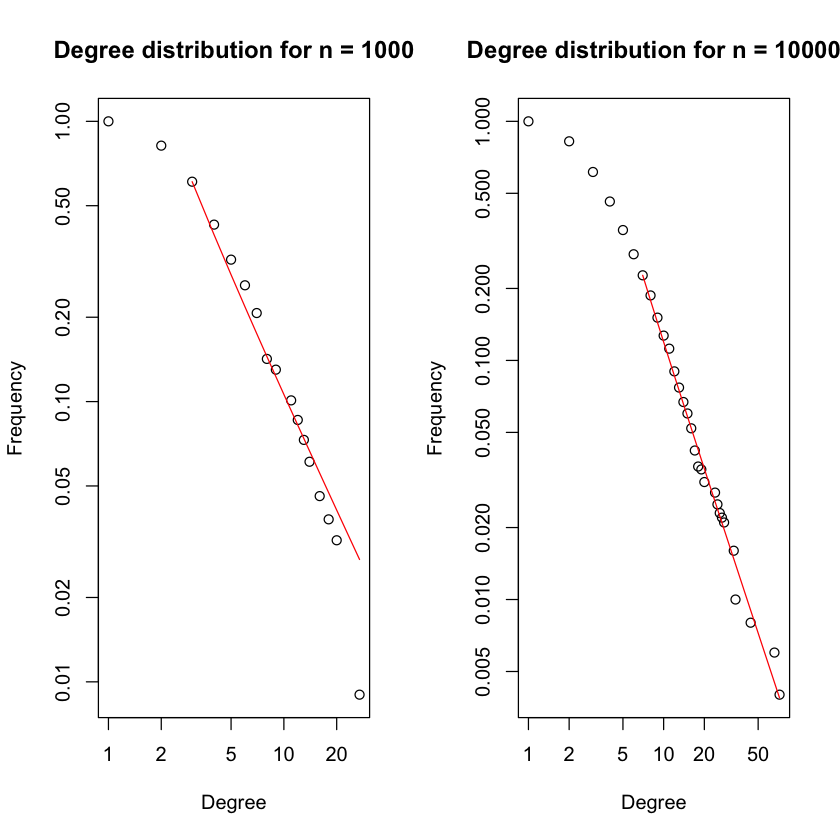

In [30]:
#part(e)
pickNum = 1000
degree_list1 = rep(0,pickNum)
degree_list2 = rep(0,pickNum)
for(i in 1:pickNum){
    node_i = sample(vcount(g1), 1)
    neighbor_i = neighbors(g1, node_i)
    j = sample(length(neighbor_i), 1)
    node_j = neighbor_i[j]
    degree_list1[i] = degree(g1, node_j)
}
for(k in 1:pickNum){
    node_i = sample(vcount(g2), 1)
    #print(node_i)
    neighbor_i = neighbors(g2, node_i)
    j = sample(length(neighbor_i), 1)
    node_j = neighbor_i[j]
    degree_list2[k] = degree(g2, node_j)
}
#print(degree_list2)
title1 = "Degree distribution for n = 1000"
title2 = "Degree distribution for n = 10000"
layout(matrix(c(1,2), 1, 2, byrow = TRUE))
library(poweRlaw)
mm1 = displ$new(degree_list1)
est1 = estimate_xmin(mm1)
mm1$setXmin(est1[[2]])
print(est1[[3]])#print gamma, slope = -gamma
mm1$setPars(est1[[3]])
plot(mm1,main=title1,xlab="Degree",ylab="Frequency")
lines(mm1,col=2)
mm2 = displ$new(degree_list2)
est2 = estimate_xmin(mm2)
mm2$setXmin(est2[[2]])
print(est2[[3]])#print gamma, slope = -gamma
mm2$setPars(est2[[3]])
plot(mm2,main=title2,xlab="Degree",ylab="Frequency")
lines(mm2,col=2)

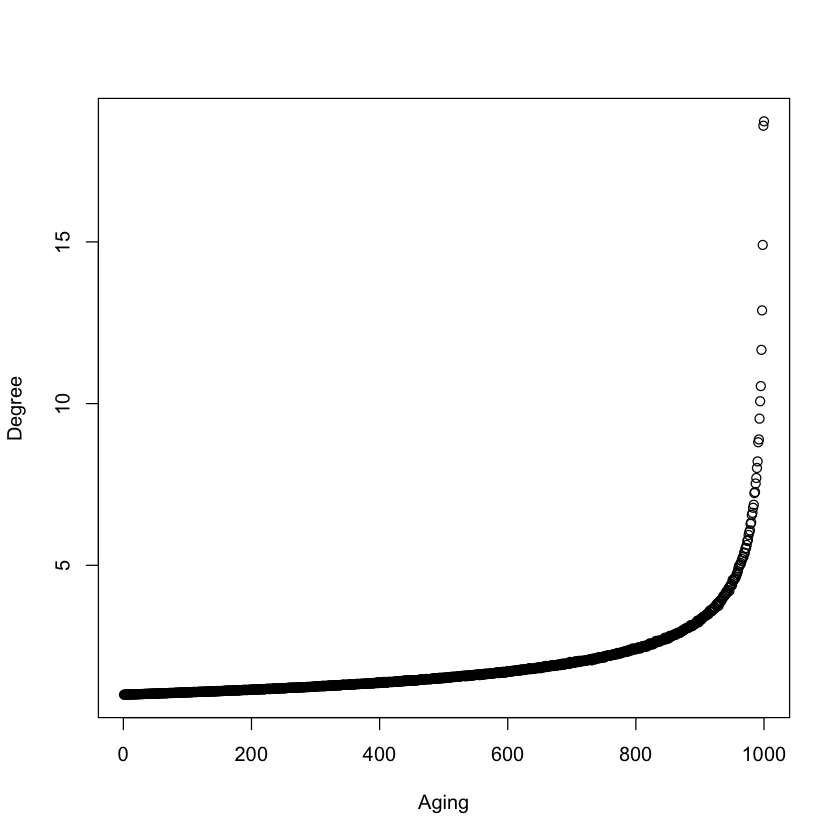

In [41]:
#part(f)
num_exp = 10000
degree_list = rep(0, 1000)
for(i in 1 : num_exp){
    gg <- barabasi.game(1000, m = 1 ,directed=F)
    degree_list = degree_list + degree(gg)
}
degree_list = degree_list / num_exp
plot(c(1000:1),degree_list,xlab="Aging",ylab="Degree") <- 

[1] 0.527219


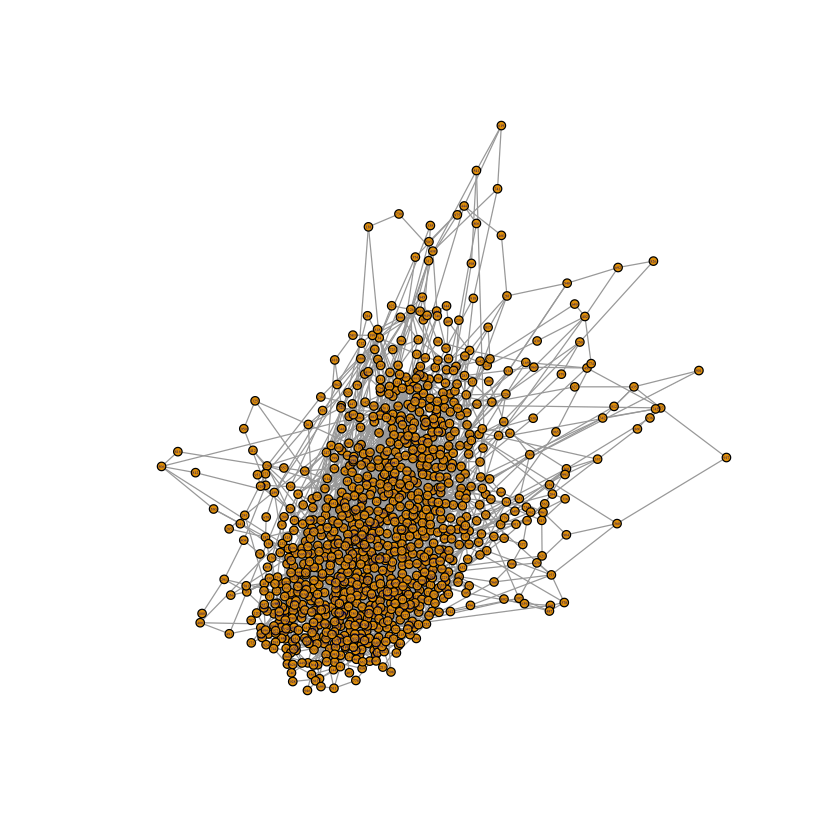

In [46]:
#part(g)
#m = 2
#(a)
g1 <- barabasi.game(1000, m = 2 ,directed=F)
plot(g1,vertex.size=3, vertex.label.cex=0.2)


In [47]:
#(b)
fg <- fastgreedy.community(g1)
print(modularity(fg))

[1] 0.527219


In [48]:
#(c)
g2 <- barabasi.game(10000, m = 2 ,directed=F)
fg2 <- fastgreedy.community(g2)
print(modularity(fg2))

[1] 0.5324642


[1] 3.116049
[1] 3.41416


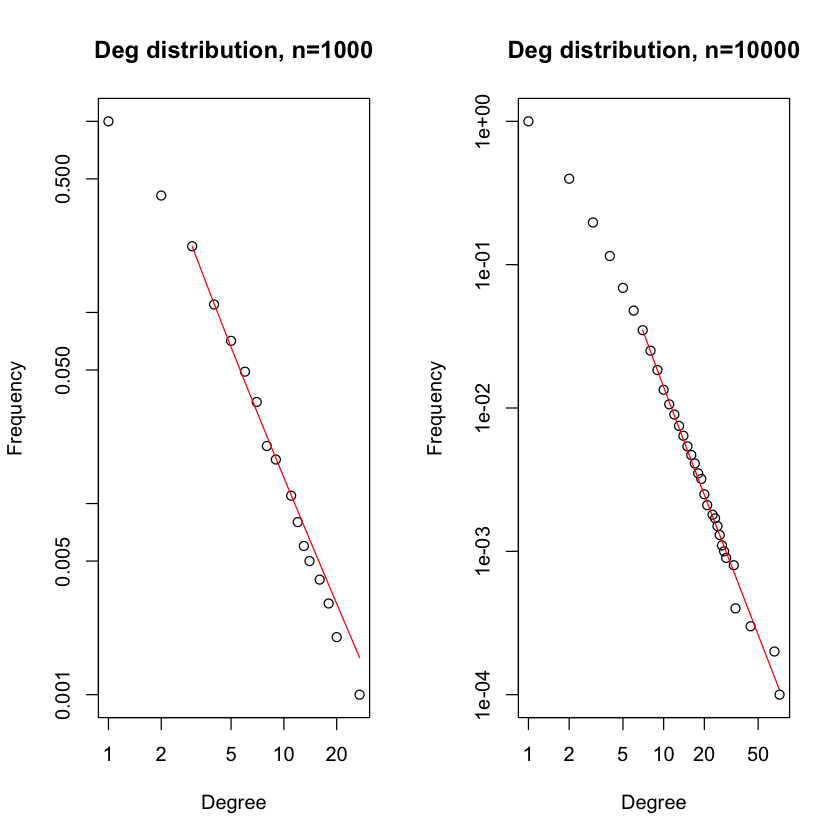

In [56]:
#(d)
layout(matrix(c(1,2), 1, 2, byrow = TRUE))
degreesVector1 <- degree(g1)
degreesVector2 <- degree(g2)
library(poweRlaw)
mm1 = displ$new(degreesVector1)
est1 = estimate_xmin(mm1)
print(est1[[3]])#print gamma, slope = -gamma
title1 = "Deg distribution, n=1000"
title2 = "Deg distribution, n=10000"
mm1$setXmin(est1[[2]])
mm1$setPars(est1[[3]])
plot(mm1,main=title1,xlab="Degree",ylab="Frequency")
lines(mm1,col=2)
mm2 = displ$new(degreesVector2)
est2 = estimate_xmin(mm2)
print(est2[[3]])#print gamma, slope = -gamma
mm2$setXmin(est2[[2]])
mm2$setPars(est2[[3]])
plot(mm2,main=title2,xlab="Degree",ylab="Frequency")
lines(mm2,col=2)

[1] 2.389995
[1] 2.844875


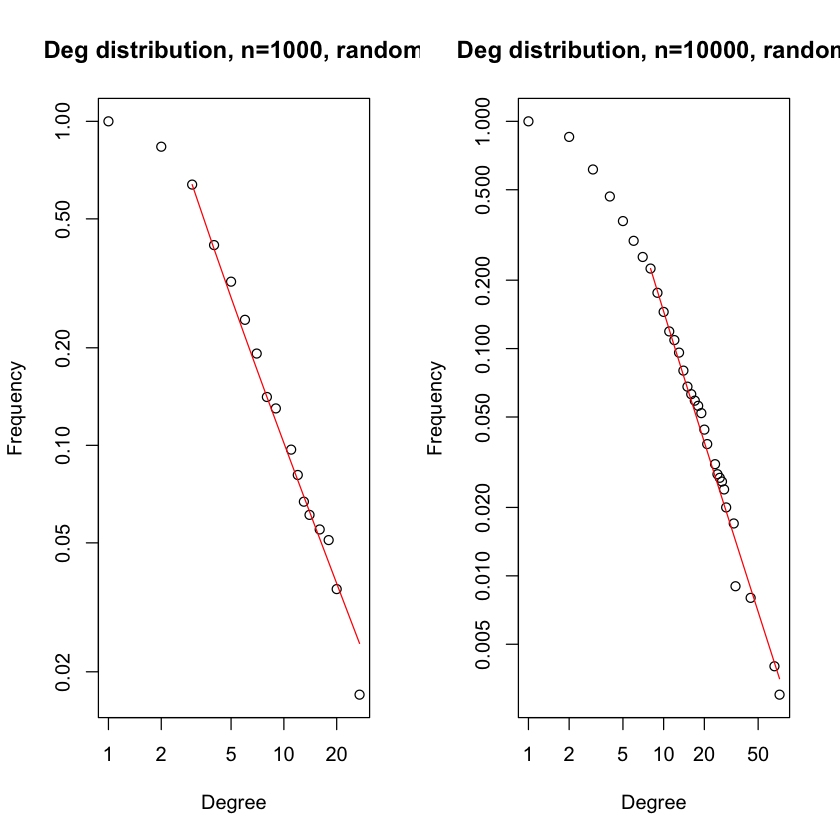

In [57]:
#(e)
pickNum = 1000
degree_list1 = rep(0,pickNum)
degree_list2 = rep(0,pickNum)
for(i in 1:pickNum){
    node_i = sample(vcount(g1), 1)
    neighbor_i = neighbors(g1, node_i)
    j = sample(length(neighbor_i), 1)
    node_j = neighbor_i[j]
    degree_list1[i] = degree(g1, node_j)
}
for(k in 1:pickNum){
    node_i = sample(vcount(g2), 1)
    #print(node_i)
    neighbor_i = neighbors(g2, node_i)
    j = sample(length(neighbor_i), 1)
    node_j = neighbor_i[j]
    degree_list2[k] = degree(g2, node_j)
}
#print(degree_list2)
title1 = "Deg distribution, n=1000, random"
title2 = "Deg distribution, n=10000, random"
layout(matrix(c(1,2), 1, 2, byrow = TRUE))
library(poweRlaw)
mm1 = displ$new(degree_list1)
est1 = estimate_xmin(mm1)
mm1$setXmin(est1[[2]])
print(est1[[3]])#print gamma, slope = -gamma
mm1$setPars(est1[[3]])
plot(mm1,main=title1,xlab="Degree",ylab="Frequency")
lines(mm1,col=2)
mm2 = displ$new(degree_list2)
est2 = estimate_xmin(mm2)
mm2$setXmin(est2[[2]])
print(est2[[3]])#print gamma, slope = -gamma
mm2$setPars(est2[[3]])
plot(mm2,main=title2,xlab="Degree",ylab="Frequency")
lines(mm2,col=2)

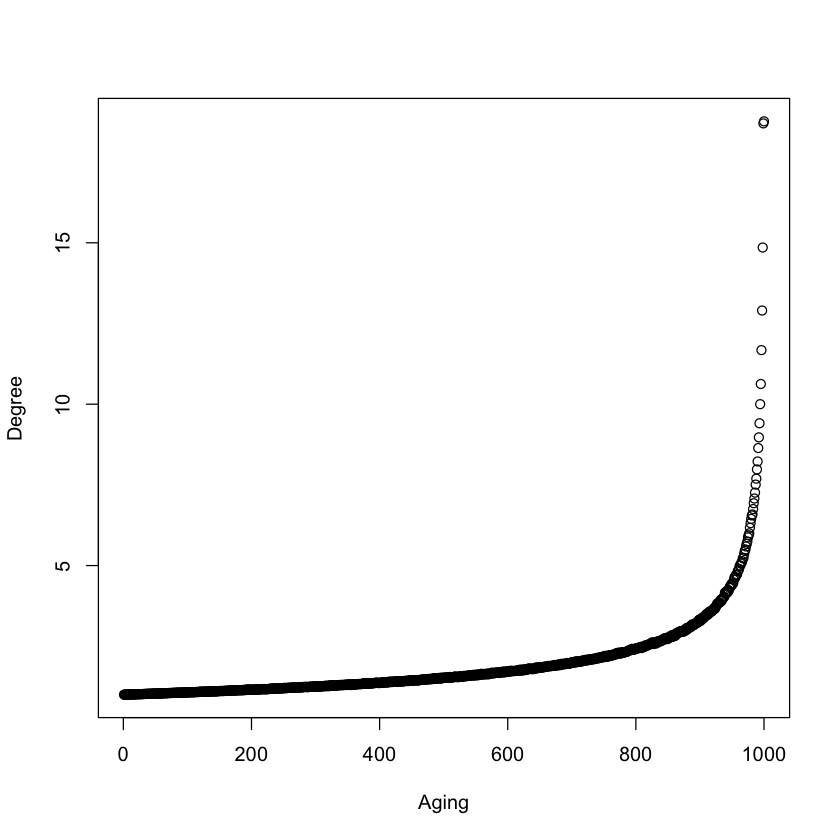

In [51]:
#(f)
num_exp = 10000
degree_list = rep(0, 1000)
for(i in 1 : num_exp){
    gg <- barabasi.game(1000, m = 1 ,directed=F)
    degree_list = degree_list + degree(gg)
}
degree_list = degree_list / num_exp
plot(c(1000:1),degree_list,xlab="Aging",ylab="Degree")

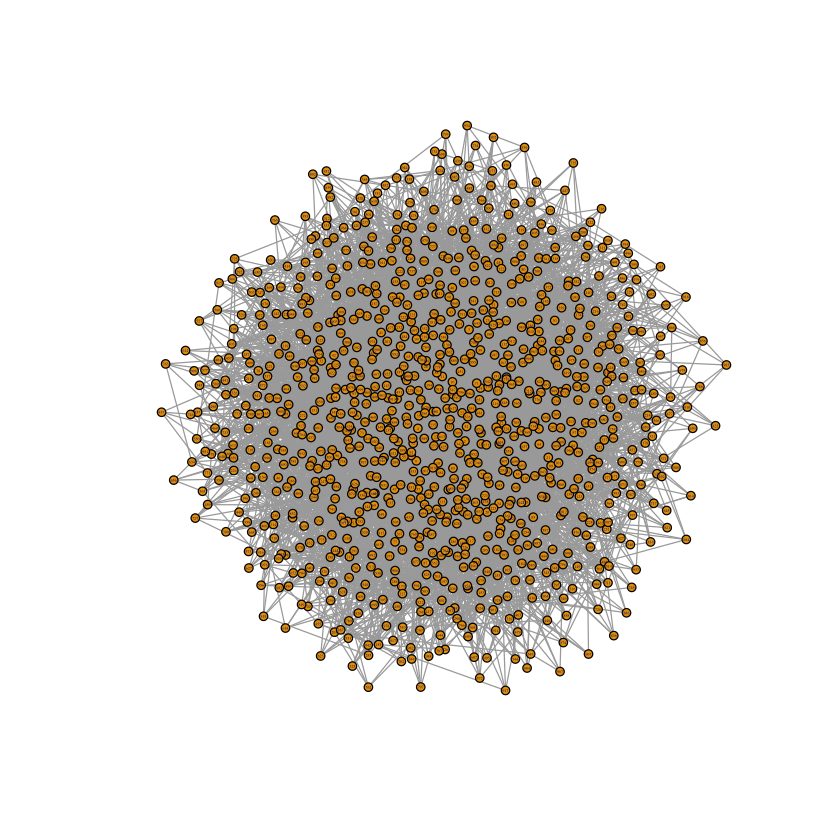

In [59]:
#part(g)
#m=5
#(a)
g1 <- barabasi.game(1000, m = 5 ,directed=F)
plot(g1,vertex.size=3, vertex.label.cex=0.2)

In [62]:
#(b)
fg <- fastgreedy.community(g1)
print(modularity(fg))

[1] 0.2781967


In [65]:
#(c)
g2 <- barabasi.game(10000, m = 5 ,directed=F)
fg2 <- fastgreedy.community(g2)
print(modularity(fg2))

[1] 0.2793549


[1] 2.849539
[1] 2.945852


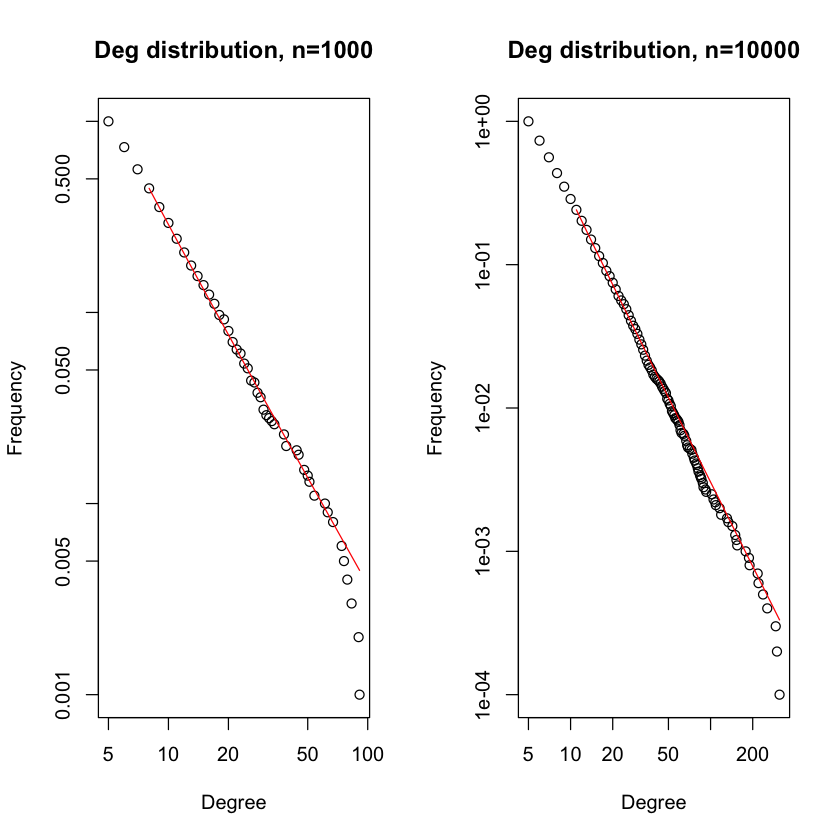

In [66]:
#(d)
layout(matrix(c(1,2), 1, 2, byrow = TRUE))
degreesVector1 <- degree(g1)
degreesVector2 <- degree(g2)
library(poweRlaw)
mm1 = displ$new(degreesVector1)
est1 = estimate_xmin(mm1)
title1 = "Deg distribution, n=1000"
title2 = "Deg distribution, n=10000"
print(est1[[3]])#print gamma, slope = -gamma
mm1$setXmin(est1[[2]])
mm1$setPars(est1[[3]])
plot(mm1,main=title1,xlab="Degree",ylab="Frequency")
lines(mm1,col=2)
mm2 = displ$new(degreesVector2)
est2 = estimate_xmin(mm2)
print(est2[[3]])#print gamma, slope = -gamma
mm2$setXmin(est2[[2]])
mm2$setPars(est2[[3]])
plot(mm2,main=title2,xlab="Degree",ylab="Frequency")
lines(mm2,col=2)

[1] 1.972576
[1] 2.077868


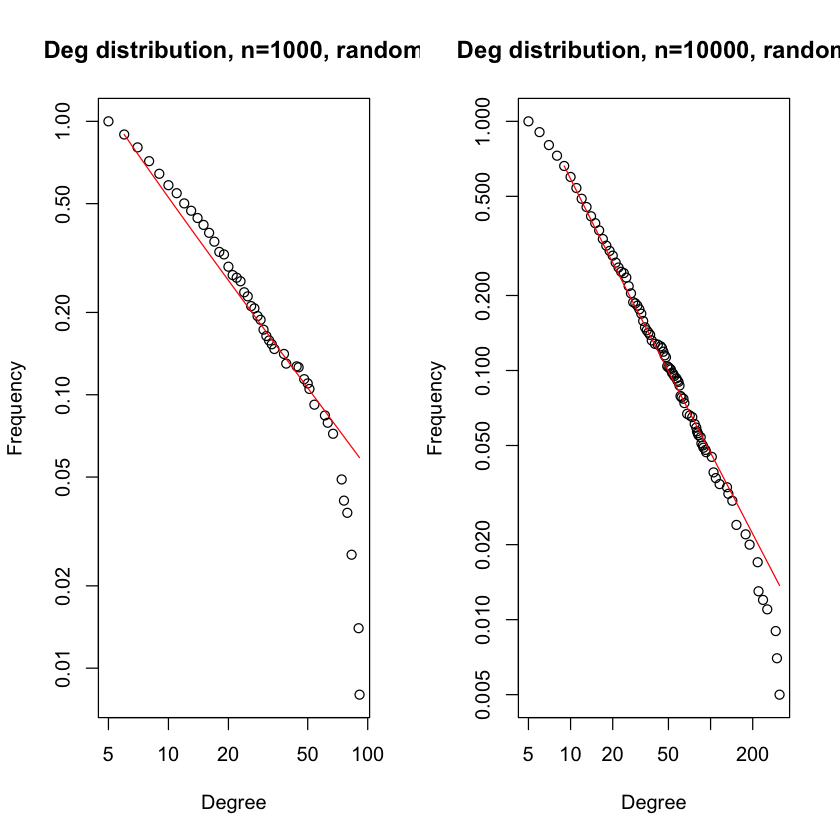

In [67]:
#(e)
pickNum = 1000
degree_list1 = rep(0,pickNum)
degree_list2 = rep(0,pickNum)
for(i in 1:pickNum){
    node_i = sample(vcount(g1), 1)
    neighbor_i = neighbors(g1, node_i)
    j = sample(length(neighbor_i), 1)
    node_j = neighbor_i[j]
    degree_list1[i] = degree(g1, node_j)
}
for(k in 1:pickNum){
    node_i = sample(vcount(g2), 1)
    #print(node_i)
    neighbor_i = neighbors(g2, node_i)
    j = sample(length(neighbor_i), 1)
    node_j = neighbor_i[j]
    degree_list2[k] = degree(g2, node_j)
}
#print(degree_list2)
title1 = "Deg distribution, n=1000, random"
title2 = "Deg distribution, n=10000, random"
layout(matrix(c(1,2), 1, 2, byrow = TRUE))
library(poweRlaw)
mm1 = displ$new(degree_list1)
est1 = estimate_xmin(mm1)
mm1$setXmin(est1[[2]])
print(est1[[3]])#print gamma, slope = -gamma
mm1$setPars(est1[[3]])
plot(mm1,main=title1,xlab="Degree",ylab="Frequency")
lines(mm1,col=2)
mm2 = displ$new(degree_list2)
est2 = estimate_xmin(mm2)
mm2$setXmin(est2[[2]])
print(est2[[3]])#print gamma, slope = -gamma
mm2$setPars(est2[[3]])
plot(mm2,main=title2,xlab="Degree",ylab="Frequency")
lines(mm2,col=2)

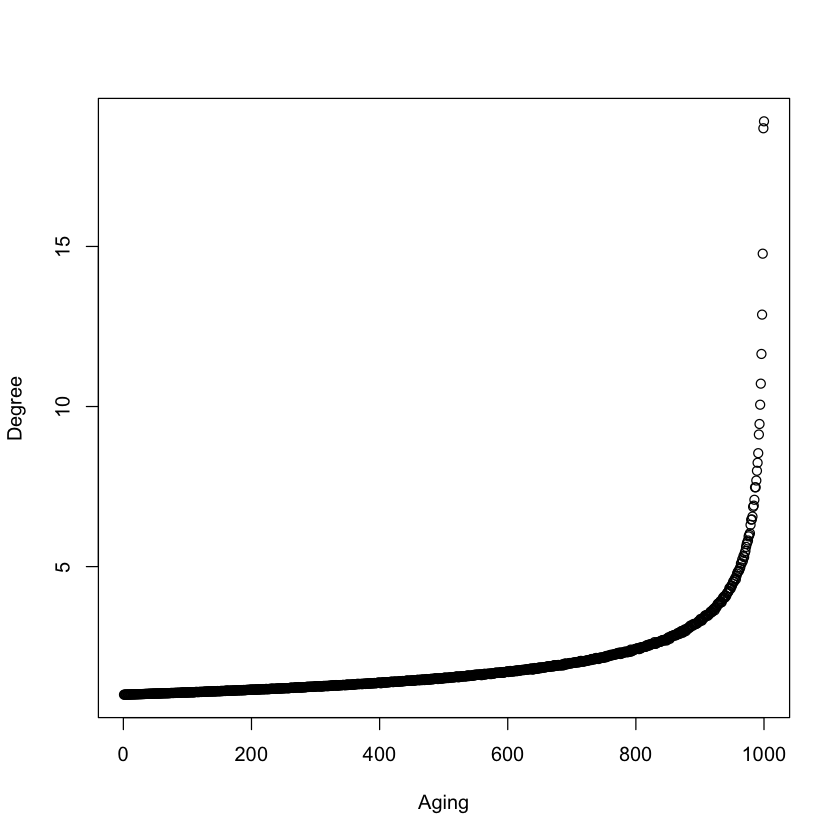

In [57]:
#(f)
num_exp = 10000
degree_list = rep(0, 1000)
for(i in 1 : num_exp){
    gg <- barabasi.game(1000, m = 1 ,directed=F)
    degree_list = degree_list + degree(gg)
}
degree_list = degree_list / num_exp
plot(c(1000:1),degree_list,xlab="Aging",ylab="Degree")

[1] 0.9316654
[1] 0.8503894


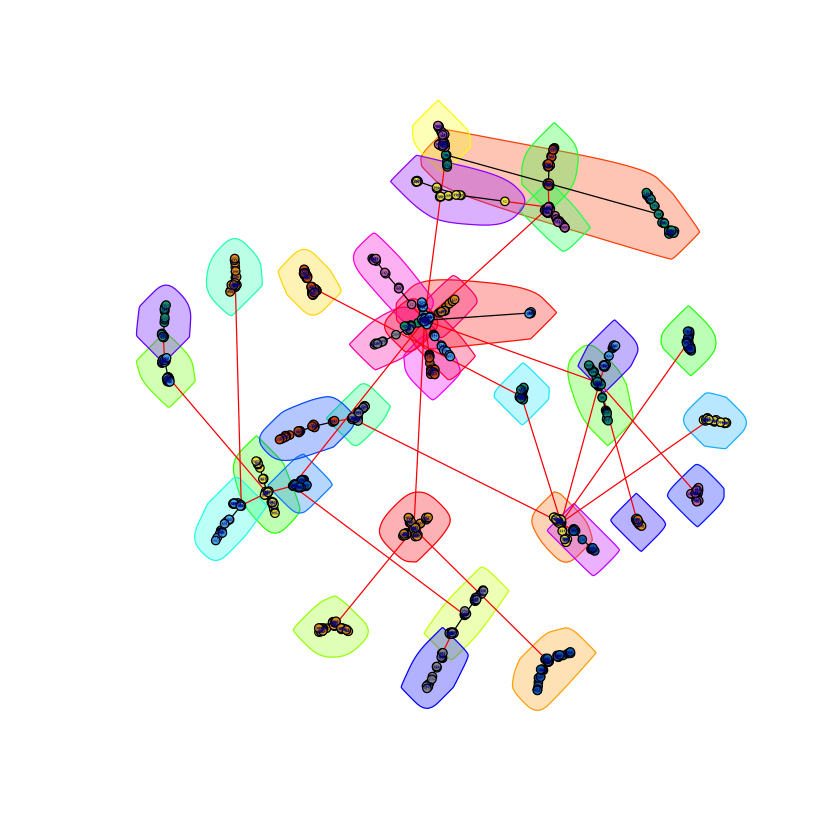

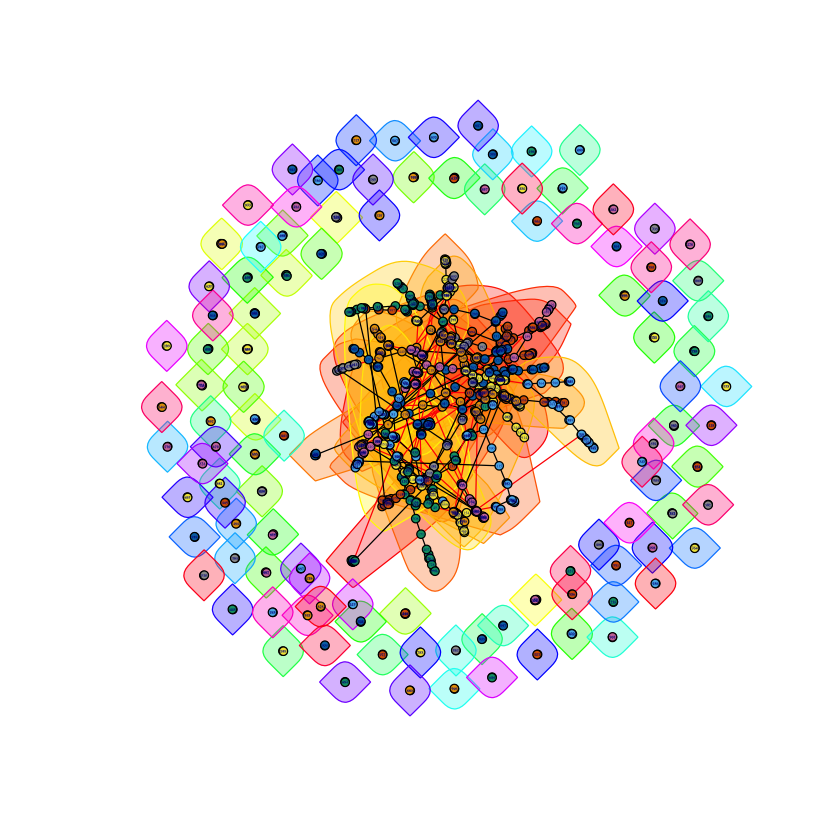

In [42]:
#part(h)
g3 = barabasi.game(1000, m = 1 ,directed=F)
degree_seq = degree(g3)
g4 = sample_degseq(degree_seq, method="simple.no.multiple") 
fg3 <- fastgreedy.community(g3)
cmsize3 <- sizes(fg3)
degree_seq4 = degree(g4)
#print((degree_seq4))
#print(cmsize3)
print(modularity(fg3))
plot(fg3,g3,vertex.size=3, vertex.label.cex=0.2)
fg4 <- fastgreedy.community(g4)
cmsize4 <- sizes(fg4)
#print(cmsize4)
print(modularity(fg4))
plot(fg4,g4,vertex.size=3, vertex.label.cex=0.2)

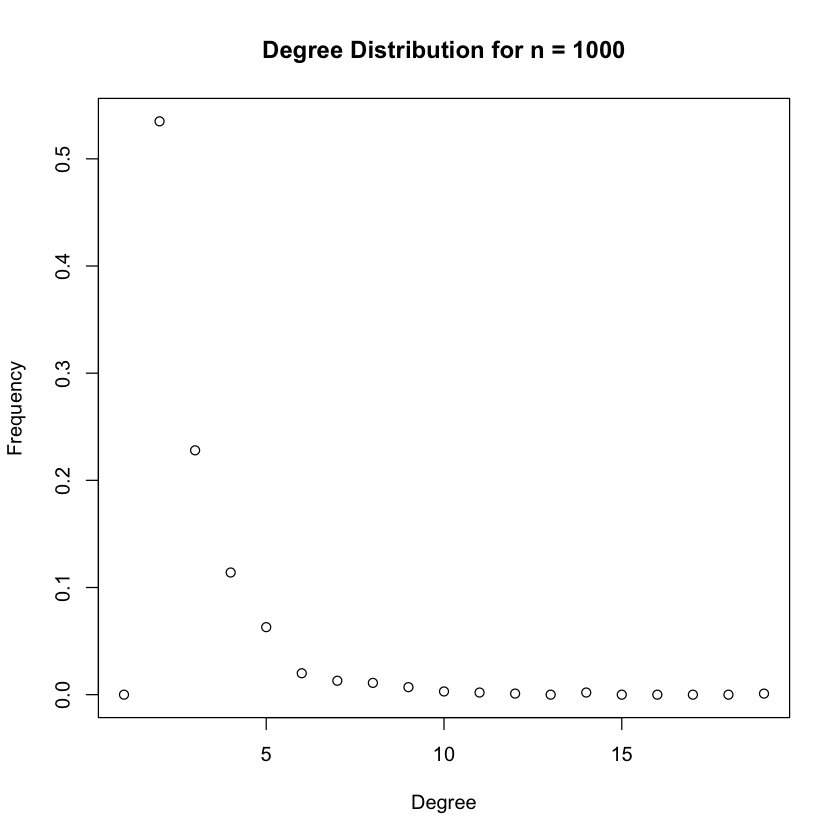

In [69]:
#problem 3
#part(a)
g5<-aging.prefatt.game(1000, pa.exp = 1, aging.exp = -1,directed=F )
plot(degree.distribution(g5),main="Degree Distribution for n = 1000", xlab="Degree",ylab="Frequency")


[1] 0.9344765


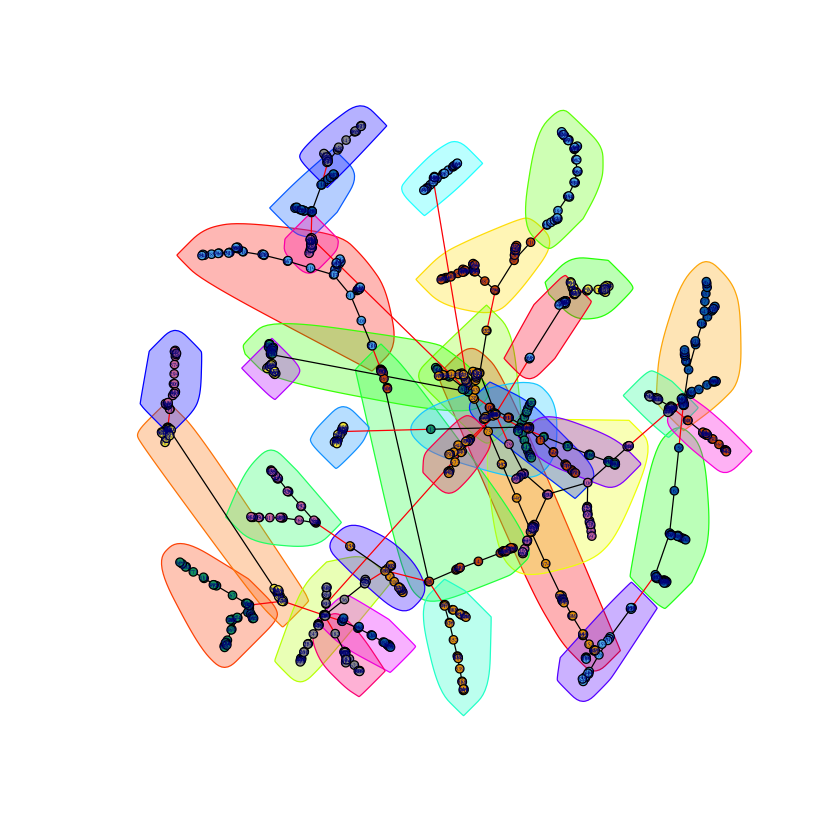

In [70]:
#problem3
#part(b)
fg5 <- fastgreedy.community(g5)
print(modularity(fg5))
plot(fg5,g5,vertex.size=3, vertex.label.cex=0.3)